In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Fri Mar 22 21:22:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install scikit-ntk

In [ ]:
import tensorflow as tfa
import keras
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,Activation,BatchNormalization
from keras.models import Sequential
from skntk import NeuralTangentKernel as NTK
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.signal as tf
print("all the libraries are imported")

all the libraries are imported


In [ ]:
dataset_dir=r'/content/drive/MyDrive/the dataset/possible dataset/data'
image_height=512
image_width=512
batch_size=32
seed=42
validation_split=0.1

In [ ]:
train=keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    batch_size=batch_size,
    label_mode='int',
    image_size=(image_height,image_width),
    seed=seed,
    validation_split=validation_split,
    subset='training'
)
test=keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    label_mode='int',
    batch_size=batch_size,
    image_size=(image_height,image_width),
    seed=seed,
    validation_split=validation_split,
    subset='validation'
)

Found 1564 files belonging to 2 classes.
Using 1408 files for training.
Found 1564 files belonging to 2 classes.
Using 156 files for validation.


In [ ]:
input_shape=(image_height,image_width,3)

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
resize_rescale=keras.Sequential([
    keras.layers.Resizing(image_height,image_width),
    keras.layers.Rescaling(1./255)
])

In [ ]:
data_augmentation=keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
])

In [ ]:
with tf.device('/GPU:0'):
  def fourier(inp=None):
    if inp==None:
        pass
    elif(inp!=None):
        return tf.fft3d(inp)
  def ntk(inp=None):
    if(inp==None):
        pass
    elif(inp!=None):
        n = NTK(depth=3, bias=0.01, bias_bounds=(1e-5, 1e5))
        return n

  model=Sequential([
      resize_rescale,
      data_augmentation,
      Conv2D(32,(3,3),activation=ntk(),input_shape=input_shape),
      MaxPool2D((3,3)),

      Conv2D(32,(3,3),activation=ntk()),
      MaxPool2D((3,3)),

      Flatten(),

      Dense(64,activation=fourier()),
      Dense(1,activation='sigmoid'),
   ])
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(train,epochs=150,batch_size=32)


Epoch 1/150
44/44 [==============================] - 265s 5s/step - loss: 3.1763 - accuracy: 0.5945
Epoch 2/150
44/44 [==============================] - 9s 183ms/step - loss: 0.5439 - accuracy: 0.7621
Epoch 3/150
44/44 [==============================] - 9s 167ms/step - loss: 0.5157 - accuracy: 0.7827
Epoch 4/150
44/44 [==============================] - 10s 197ms/step - loss: 0.5351 - accuracy: 0.7756
Epoch 5/150
44/44 [==============================] - 10s 195ms/step - loss: 0.5508 - accuracy: 0.7678
Epoch 6/150
44/44 [==============================] - 9s 175ms/step - loss: 0.4939 - accuracy: 0.7990
Epoch 7/150
44/44 [==============================] - 9s 171ms/step - loss: 0.4443 - accuracy: 0.8182
Epoch 8/150
44/44 [==============================] - 10s 204ms/step - loss: 0.4725 - accuracy: 0.7891
Epoch 9/150
44/44 [==============================] - 10s 197ms/step - loss: 0.4270 - accuracy: 0.8182
Epoch 10/150
44/44 [==============================] - 9s 180ms/step - loss: 0.4261 - acc

In [ ]:
accuracy=model.evaluate(test)
print(accuracy)

5/5 [==============================] - 29s 187ms/step - loss: 0.1058 - accuracy: 0.9679
[0.1058463528752327, 0.9679487347602844]


In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

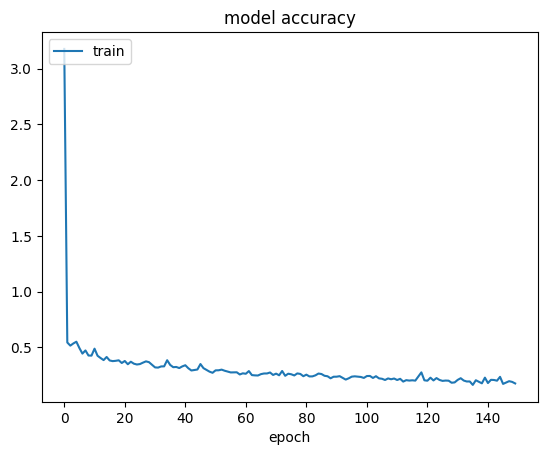

In [ ]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
amcuracy=model.evaluate(train)
print(amcuracy)

44/44 [==============================] - 9s 167ms/step - loss: 0.1339 - accuracy: 0.9467
[0.13388629257678986, 0.9467329382896423]
